# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [ ]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

In [1]:
# !pip install plotly
!pip install gensim

In [24]:
import psutil
print(f"Available RAM: {psutil.virtual_memory().available / 1024**3:.2f} GB")
import gc
gc.collect()
print(f"Available RAM: {psutil.virtual_memory().available / 1024**3:.2f} GB")

Available RAM: 0.63 GB
Available RAM: 0.61 GB


## Importing the necessary libraries

In [11]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
# Natural Language Toolkit for text processing
import nltk  
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (
    # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations

## Word cloud
from wordcloud import WordCloud

### Cleaner displays for dataset
from IPython.display import display


### Word2vec model packages
import gensim
print(gensim.__version__)

### Word2vec model packages
from gensim.models import Word2Vec
import gensim.downloader as api

# # This will download and load the model
# word2vecmodel = api.load("word2vec-google-news-300")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHAMBHAVVISEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


4.3.2


In [12]:
# Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [13]:
# Import the first file - True.csv
True_file=pd.read_csv("True.csv")

# Import the second file - Fake.csv
Fake_file=pd.read_csv("Fake.csv")

# Display headers of tables
display(True_file.head(2)) 
display(Fake_file.head(2))

title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script   
1  U.S. military to accept transgender recruits on Monday: Pentagon   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [14]:
# Inspect the DataFrame with True News to understand the given data
True_file.shape

(21417, 3)

In [15]:
# Inspect the DataFrame with Fake News to understand the given data
Fake_file.shape

(23523, 3)

In [16]:
# Print the column details for True News DataFrame
True_file.columns

Index(['title', 'text', 'date'], dtype='object')

In [17]:
# Print the column details for Fake News Dataframe
Fake_file.columns

Index(['title', 'text', 'date'], dtype='object')

In [18]:
# Print the column names of both DataFrames
print(f"""
    True_column details: {True_file.columns} \n
    Fake column details: {Fake_file.columns}
      """)


    True_column details: Index(['title', 'text', 'date'], dtype='object') 

    Fake column details: Index(['title', 'text', 'date'], dtype='object')
      


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [19]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
True_file["news_label"]=1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
Fake_file["news_label"]=0

print(True_file.news_label.value_counts())
print(Fake_file.news_label.value_counts())


news_label
1    21417
Name: count, dtype: int64
news_label
0    23523
Name: count, dtype: int64


### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [24]:
# Combine the true and fake news DataFrames into a single DataFrame
merged_data=pd.concat([True_file,Fake_file],axis=0)
merged_data.shape
print(f"{'Merged correctly' if (True_file.shape[0]+Fake_file.shape[0]==merged_data.shape[0]) else 'Merge incorrect'}")
merged_data.shape

Merged correctly


(44940, 4)

In [25]:
# Display the first 5 rows of the combined DataFrame to verify the result
merged_data.head(5)

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [26]:
# Check Presence of Null Values
display(merged_data.isnull().sum())
print(f"{'No missing data' if not merged_data.isnull().any().any() else 'Missing exists investigate further'}")

title         21
text          21
date          42
news_label     0
dtype: int64

Missing exists investigate further


In [29]:
# Handle Rows with Null Values
merged_data.dropna(subset=['title','text'],inplace=True)
display(merged_data.shape)
print(f"{'No missing data' if not merged_data.isnull().any().any() else 'Missing exists investigate further'}")
print(merged_data.isnull().sum())

## Handling null in Date column with frequency
merged_data["date"].fillna(method="ffill",inplace=True)
display(merged_data.isna().sum())
merged_data.reset_index(inplace=True)

(44919, 5)

No missing data
index         0
title         0
text          0
date          0
news_label    0
dtype: int64


index         0
title         0
text          0
date          0
news_label    0
dtype: int64

Dropping only the missing records if the text and title for empty. Because blank text does make sense training with. Handling nulls in data by forward fill of the data because column Date will be not used for training rather it can be used for data visualization

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [30]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
merged_data['news_text']=[merged_data["title"][i]+' '+merged_data["text"][i] for i in range(merged_data.shape[0])]
# display(merged_data.head(1))
# Drop the irrelevant columns from the DataFrame as they are no longer needed
final_df=merged_data.drop(columns=["title","text","index","date"])
# Display the first 5 rows of the updated DataFrame to check the result
display(final_df.head(5))
final_df.news_label.value_counts()

level_0  news_label  \
0        0           1   
1        1           1   
2        2           1   
3        3           1   
4        4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

news_label
0    23502
1    21417
Name: count, dtype: int64

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [15]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean=pd.DataFrame(columns=["cleaned_text","lemma_text"])
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label']=[]
df_clean

,cleaned_text,lemma_text,news_label


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [17]:
## To remove special ASCII characters
import unicodedata
# Write the function here to clean the text and remove all the unnecessary elements

def text_preprocessing(data=None,col=None):
    cleaned_text=[]
    for idx in range(data.shape[0]):
        ### Convert the text to lowercase ###
        text=data[col][idx].lower()
        text = unicodedata.normalize('NFKD', text)

        ### Removes citations (words within square brackets) ###
        text=re.sub(r'\[.*?\]',"",text)

        ### Removes alphanumeric words ###
        text=re.sub(r'\w*\d\w*',"",text)

        ### Remove punctuations ###
        text=re.sub(r'[^a-zA-Z\s]',"",text)
        cleaned_text.append(text)
    return cleaned_text
## testing
text_preprocessing(merged_data.head(2),"news_text")

['as us budget fight looms republicans flip their fiscal script washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense discretionary spending 

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [18]:
# Apply the function to clean the news text and remove all unnecessary elements
cleaned_text=text_preprocessing(data=merged_data,col="news_text")
# Store it in a separate column in the new DataFrame
df_clean["cleaned_text"]=cleaned_text
df_clean.head()

cleaned_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          as us budget fight looms republicans flip their fiscal script washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense discretionary spending on programs that support education scientific research infrastructure public health and environmental protection the trump administration has already been willing to say were going to increase nondefense discretionary spending  by about  percent meadows chairman of the small but influential house freedom caucus said on the program now democrats are saying thats not enough we need to give the government a pay raise of  to  percent for a fiscal conservative i dont see where the rationale is  eventually you run out of other peoples money he said meadows was among republicans who voted in late december for their partys debtfinanced tax overhaul which is expected to balloon the federal budget deficit and add about  trillion over  years to the  trillion national debt its interesting to hear mark talk about fiscal responsibility democratic us representative joseph crowley said on cbs crowley said the republican tax bill would require the  united states to borrow  trillion to be paid off by future generations to finance tax cuts for corporations and the rich this is one of the least  fiscally responsible bills weve ever seen passed in the history of the house of representatives i think were going to be paying for this for many many years to come crowley said republicans insist the tax package the biggest us tax overhaul in more than  years  will boost the economy and job growth house speaker paul ryan who also supported the tax bill recently went further than meadows making clear in a radio interview that welfare or entitlement reform as the party often calls it would be a top republican priority in  in republican parlance entitlement programs mean food stamps housing assistance medicare and medicaid health insurance for the elderly poor and disabled as well as other programs created by washington to assist the needy democrats seized on ryans early december remarks saying they showed republicans would try to pay for their tax overhaul by seeking spending cuts for social programs but the goals of house republicans may have to take a back seat to the senate where the votes of some democrats will be needed to approve a budget and prevent a government shutdown democrats will use their leverage in the senate which republicans narrowly control to defend both discretionary nondefense programs and social spending while tackling the issue of the dreamers people brought illegally to the country as children trump in september put a march 

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [36]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
### Pos tags and stopwords removal
def pos_tagging_lemma(data=None,col=None):
    pos_tags=[]
    for idx in range(data.shape[0]):
        tokens=nlp(data[col][idx])
        postags=[(token.lemma_,token.tag_) for token in tokens if (token.tag_ in ["NN","NNS"] and token.text not in stopwords.words("english"))]
        # sw_removed=[pos for row in postags for pos in row if postags not in stopwords.words("english")]
        pos_tags.append([postags])
    return pos_tags
pprint(pos_tagging_lemma(df_clean.head(2),'cleaned_text'))
len(pos_tagging_lemma(df_clean.head(2),'cleaned_text'))


[[[('budget', 'NN'),
   ('fight', 'NN'),
   ('script', 'NN'),
   ('head', 'NN'),
   ('faction', 'NN'),
   ('month', 'NN'),
   ('expansion', 'NN'),
   ('debt', 'NN'),
   ('tax', 'NN'),
   ('cut', 'NNS'),
   ('conservative', 'NN'),
   ('budget', 'NN'),
   ('restraint', 'NN'),
   ('pivot', 'NNS'),
   ('way', 'NN'),
   ('mark', 'NN'),
   ('meadow', 'NNS'),
   ('nation', 'NN'),
   ('line', 'NN'),
   ('spending', 'NN'),
   ('lawmaker', 'NNS'),
   ('battle', 'NN'),
   ('holiday', 'NNS'),
   ('lawmaker', 'NNS'),
   ('budget', 'NN'),
   ('fight', 'NN'),
   ('issue', 'NNS'),
   ('immigration', 'NN'),
   ('policy', 'NN'),
   ('election', 'NN'),
   ('campaign', 'NNS'),
   ('approach', 'NN'),
   ('control', 'NN'),
   ('budget', 'NN'),
   ('increase', 'NN'),
   ('spending', 'NN'),
   ('democrat', 'NNS'),
   ('increase', 'NNS'),
   ('nondefense', 'NN'),
   ('spending', 'NN'),
   ('program', 'NNS'),
   ('education', 'NN'),
   ('research', 'NN'),
   ('infrastructure', 'NN'),
   ('health', 'NN'),
   ('p

2

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [37]:
# Apply POS tagging and lemmatization function to cleaned text
pos_lemma=pos_tagging_lemma(data=df_clean,col="cleaned_text")
# Store it in a separate column in the new DataFrame
df_clean['lemma_text']=pos_lemma
df_clean["news_label"]=merged_data["news_label"]
df_clean.head(2)

cleaned_text  \
0  as us budget fight looms republicans flip their fiscal script washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense discretionary spending on programs that support education scientific research infrastructure public health and environmental protection the trump administration has already been willing to say were going to increase nondefense discretionary spending  by about  percent meadows chairman of the small but influential house freedom caucus said on the program now democrats are saying thats not enough we need to give the government a pay raise of  to  percent for a fiscal conservative i dont see where the rationale is  eventually you run out of other peoples money he said meadows was among republicans who voted in late december for their partys debtfinanced tax overhaul which is expected to balloon the federal budget deficit and add about  trillion over  years to the  trillion national debt its interesting to hear mark talk about fiscal responsibility democratic us representative joseph crowley said on cbs crowley said the republican tax bill would require the  united states to borrow  trillion to be paid off by future generations to finance tax cuts for corporations and the rich this is one of the least  fiscally responsible bills weve ever seen passed in the history of the house of representatives i think were going to be paying for this for many many years to come crowley said republicans insist the tax package the biggest us tax overhaul in more than  years  will boost the economy and job growth house speaker paul ryan who also supported the tax bill recently went further than meadows making clear in a radio interview that welfare or entitlement reform as the party often calls it would be a top republican priority in  in republican parlance entitlement programs mean food stamps housing assistance medicare and medicaid health insurance for the elderly poor and disabled as well as other programs created by washington to assist the needy democrats seized on ryans early december remarks saying they showed republicans would try to pay for their tax overhaul by seeking spending cuts for social programs but the goals of house republicans may have to take a back seat to the senate where the votes of some democrats will be needed to approve a budget and prevent a government shutdown democrats will use their leverage in the senate which republicans narrowly control to defend both discretionary nondefense programs and social spending while tackling the issue of the dreamers people brought illegally to the country as children trump in september put a march  expiration date on the deferred action for childhood arrivals or daca program which protects the young immigrants from deportation and provides them with work permits the president has said in recent twitter messages he wants funding for his proposed mexican border wall and other immigration law changes in exchange for agreeing to help the dreamers representative debbie dingell told cbs she did not favor linking that issue to other policy objectives such as wall funding we need to do daca clean she said  on wednes

### Save the Cleaned data as a csv file (Recommended)

In [31]:
## Recommended to perform the below steps to save time while rerunning the code
# df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")
## Saving list as list because 
import ast
df_clean["lemma_text"]=[ast.literal_eval(df_clean["lemma_text"][i]) for i in range(df_clean.shape[0])]


In [32]:
# Check the first few rows of the DataFrame
df_clean.head(2)

cleaned_text  \
0  as us budget fight looms republicans flip their fiscal script washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense discretionary spending on programs that support education scientific research infrastructure public health and environmental protection the trump administration has already been willing to say were going to increase nondefense discretionary spending  by about  percent meadows chairman of the small but influential house freedom caucus said on the program now democrats are saying thats not enough we need to give the government a pay raise of  to  percent for a fiscal conservative i dont see where the rationale is  eventually you run out of other peoples money he said meadows was among republicans who voted in late december for their partys debtfinanced tax overhaul which is expected to balloon the federal budget deficit and add about  trillion over  years to the  trillion national debt its interesting to hear mark talk about fiscal responsibility democratic us representative joseph crowley said on cbs crowley said the republican tax bill would require the  united states to borrow  trillion to be paid off by future generations to finance tax cuts for corporations and the rich this is one of the least  fiscally responsible bills weve ever seen passed in the history of the house of representatives i think were going to be paying for this for many many years to come crowley said republicans insist the tax package the biggest us tax overhaul in more than  years  will boost the economy and job growth house speaker paul ryan who also supported the tax bill recently went further than meadows making clear in a radio interview that welfare or entitlement reform as the party often calls it would be a top republican priority in  in republican parlance entitlement programs mean food stamps housing assistance medicare and medicaid health insurance for the elderly poor and disabled as well as other programs created by washington to assist the needy democrats seized on ryans early december remarks saying they showed republicans would try to pay for their tax overhaul by seeking spending cuts for social programs but the goals of house republicans may have to take a back seat to the senate where the votes of some democrats will be needed to approve a budget and prevent a government shutdown democrats will use their leverage in the senate which republicans narrowly control to defend both discretionary nondefense programs and social spending while tackling the issue of the dreamers people brought illegally to the country as children trump in september put a march  expiration date on the deferred action for childhood arrivals or daca program which protects the young immigrants from deportation and provides them with work permits the president has said in recent twitter messages he wants funding for his proposed mexican border wall and other immigration law changes in exchange for agreeing to help the dreamers representative debbie dingell told cbs she did not favor linking that issue to other policy objectives such as wall funding we need to do daca clean she said  on wednes

In [33]:
# Check the dimensions of the DataFrame
df_clean.shape

(44919, 3)

In [34]:
# Check the number of non-null entries and data types of each column
display(df_clean.dtypes)
display(df_clean.shape)


cleaned_text    object
lemma_text      object
news_label       int64
dtype: object

(44919, 3)

## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [35]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df_clean,test_size=0.3,random_state=100)
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)
print(f"train_shape:{train_df.shape} & target_ratio: {100*train_df.news_label.mean():.2f}%")
print(f"test_shape:{test_df.shape} & target_ratio: {100*test_df.news_label.mean():.2f}%")

## dropping index column
train_df.drop(columns="index",inplace=True)
test_df.drop(columns="index",inplace=True)

train_shape:(31443, 4) & target_ratio: 47.62%
test_shape:(13476, 4) & target_ratio: 47.83%


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [36]:
# Add a new column to calculate the character length of cleaned news text
train_df["clean_text_len"]=[len(train_df["cleaned_text"][i]) for i in range(train_df.shape[0])]
# # Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df["lemma_text_len"]=[len(train_df["lemma_text"][i][0]) for i in range(train_df.shape[0])]
train_df.head(5)


cleaned_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    indonesia president nominates air chief to replace controversial military head jakarta reuters  indonesian president joko widodo has nominated the chief of staff of the air force to be the new head of the armed forces tni to replace a controversial general who is due to retire in april air chief marshal hadi tjahjanto has close ties to the president and was previously in charge of an air base in the city of solo on the island of java when widodo was its mayor since then tjahjanto has been promoted a number of times including to inspector general of the defense ministry and the president s military secretary  marshal hadi tjahjanto is considered capable and qualified to become tni commander  presidential spokesman johan budi told reporters on monday after confirming the nomination the proposal had been sent to the parliament which needs to approve it he said abdul kharis almasyhari chairman of a parliamentary commission with oversight of defense and security said the commission would do a  fit and proper  assessment of the nomination which hopefully could be completed by a dec   recess the outgoing armed forces chef general gatot nurmantyo who will step down at the end of his term in april has often courted controversy over what analysts see as his political ambitions  he has been accused of whipping up nationalist sentiment by promoting the notion that indonesia is besieged by  proxy wars  waged by foreign states looking to undermine it in october widodo said the armed forces should stay out of politics and ensure their loyalty was only to the state and the government  a statement many believed referred to nurmantyo s actions there has been specul

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

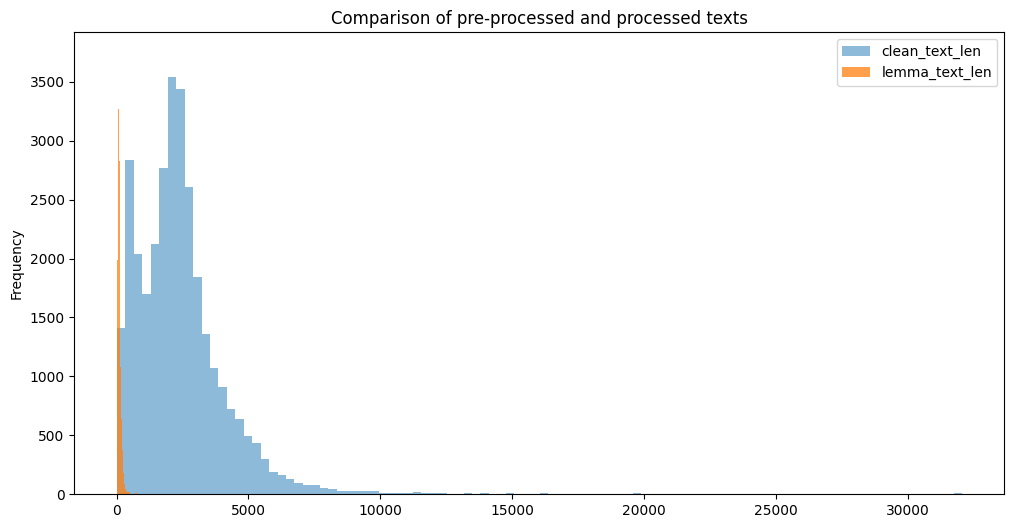

In [37]:
# Create a histogram plot to visualise character lengths
def plot_histogram(data=None,col=list,bins_size=10):
    plt.figure(figsize=(12,6))
    plt.hist(data[col[0]],bins=bins_size,label=f"{col[0]}",alpha=0.5)
    plt.hist(data[col[1]],bins_size,label=f"{col[1]}",alpha=0.75)
    plt.legend()
    plt.ylabel("Frequency")
    plt.title(f"Comparison of pre-processed and processed texts")
    plt.show()
# Add histogram for cleaned news text
# Add histogram for lemmatized news text with POS tags removed
plot_histogram(data=train_df,col=["clean_text_len","lemma_text_len"],bins_size=100)


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

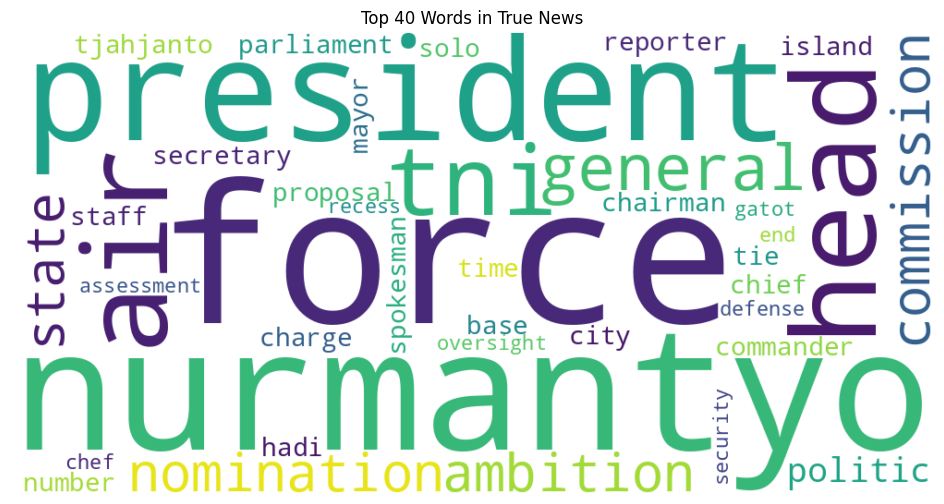

In [38]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
true_news=train_df[train_df["news_label"]==1].reset_index()
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_words=" ".join([word[0] for row in true_news["lemma_text"][0] for word in row])
### Generate word cloud for True News
wordcloud = WordCloud(width=1000, height=500, max_words=40, background_color='white').generate(true_news_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in True News")
plt.show()
# " ".join([word for row in true_news["lemma_text"] for word in row])[:500]

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

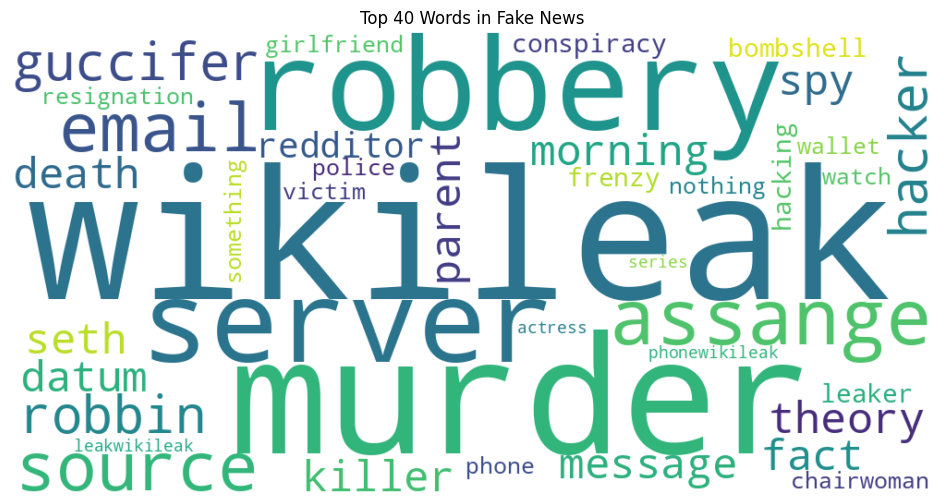

In [39]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
fake_news=train_df[train_df["news_label"]==0].reset_index()
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_words=" ".join([word[0] for row in fake_news["lemma_text"][0] for word in row])

# Generate word cloud for Fake News
wordcloud = WordCloud(width=1000, height=500, max_words=40, background_color='white').generate(fake_news_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in Fake News")
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [58]:
# Write a function to get the specified top n-grams
from nltk import ngrams
def generate_ngrams(data=None,col=None,n=1):
    """
    data: dataframe to be used with cleaned and lemmatized pos_tagged columns
    col: lemmatized column name
    n: int defining the n-grams
    """
    list_ngrams=[]
    for idx in range(data.shape[0]):
        tokens=[data[col][idx][0][i][0] for i in range(len(data[col][idx][0]))]
        gram=list(ngrams(tokens,n=n))
        joined_ngrams = [" ".join(pair) for pair in gram]
        list_ngrams.append(joined_ngrams)
    
    return list_ngrams
display(len(generate_ngrams(train_df.head(2),"lemma_text",n=1)))
len(np.concatenate(generate_ngrams(df_clean.head(2),"lemma_text",n=1)))
### Counter function
def count_n_plot(data=None,col=None,n=1,k=10,lbl=None):
    
    """
    Inputs:
    data: dataframe 
    col: variable to work with
    n: int n-grams
    k: top k words
    lbl: mention uni or bi-gram for plotting purposes
    Outputs:
    returns top k words and counts with a plot
    """
        
    grams=generate_ngrams(data=data,col=col,n=n)

    ### store them in data frame 
    uni_df=pd.DataFrame(np.concatenate(grams),columns=["words"])

    ## Counts the data
    print("Top 10 frequent words")
    print(f"Number of unique words:{uni_df.words.value_counts().index.shape}")
    display(uni_df.words.value_counts()[:k])
    

    ### Visualization 
    plt.figure(figsize=(12,6))
    plt.bar(uni_df.words.value_counts()[:k].index,uni_df.words.value_counts().values[:k])
    plt.xticks(rotation=90)
    plt.title(f"Top {k} {lbl}")
    plt.ylabel("Frequency")
    plt.xlabel("Words")
    plt.show()



2

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [54]:
# Handle NaN values in the text data
train_df.isnull().sum()

cleaned_text      0
lemma_text        0
news_label        0
clean_text_len    0
lemma_text_len    0
dtype: int64

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

True News - Top 10 frequent words
Number of unique words:(28197,)


words
trump         28298
state         14223
government    14032
year          13570
people        10663
election       9883
country        9505
official       9420
party          8338
president      8011
Name: count, dtype: int64

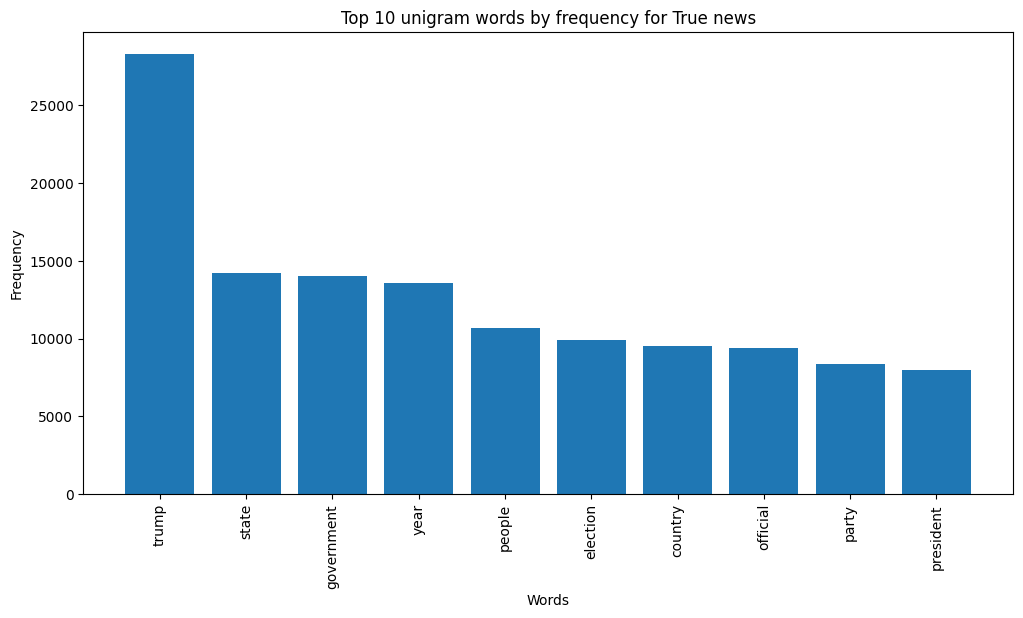

In [55]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
count_n_plot(true_news,col="lemma_text",n=1,k=10,lbl="unigram words by frequency for True news")

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



True News - Top 10 frequent words
Number of unique words:(651063,)


words
trump administration    1308
trump campaign          1233
news conference          979
tax reform               737
request comment          700
security force           699
percent percent          690
house representative     690
climate change           682
intelligence agency      650
Name: count, dtype: int64

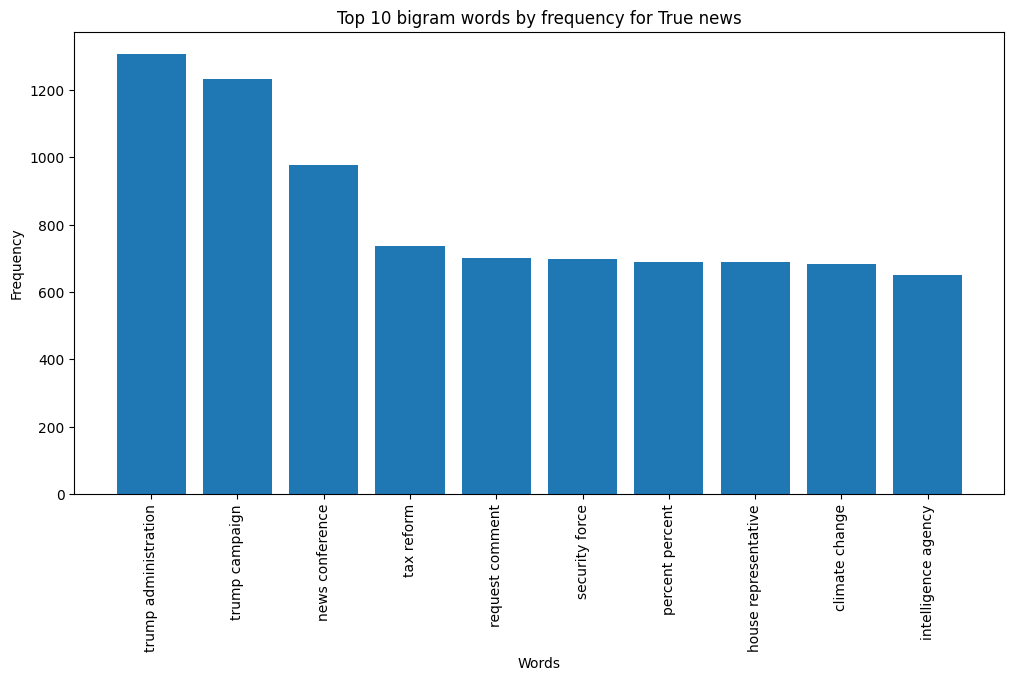

In [56]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
count_n_plot(true_news,col="lemma_text",n=2,k=10,lbl="bigram words by frequency for True news")

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



True News - Top 10 frequent words
Number of unique words:(1217882,)


words
official condition anonymity    252
candidate donald trump          183
trump transition team           177
tax rate percent                156
state department official       135
editorial staff sap             128
sap involvement creation        128
sap editorial staff             128
part sap editorial              128
article part sap                128
Name: count, dtype: int64

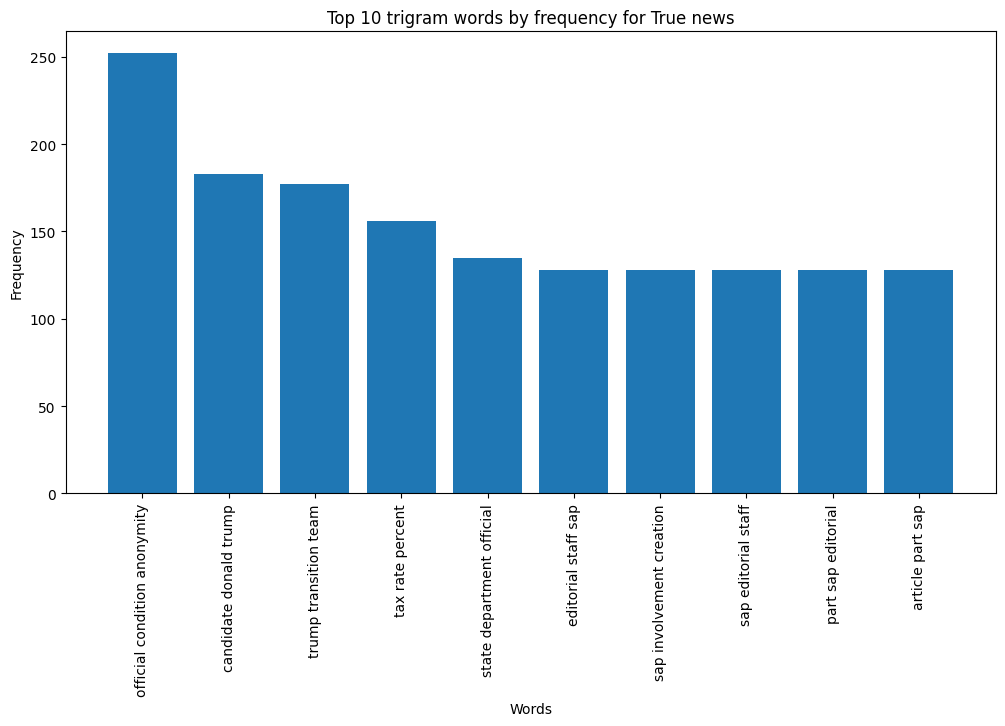

In [57]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
count_n_plot(true_news,col="lemma_text",n=3,k=10,lbl="trigram words by frequency for True news")

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 frequent words
Number of unique words:(65320,)


words
trump        41194
people       18558
president    11695
time         11392
year         10702
image         9778
state         9204
woman         8012
video         7996
campaign      7899
Name: count, dtype: int64

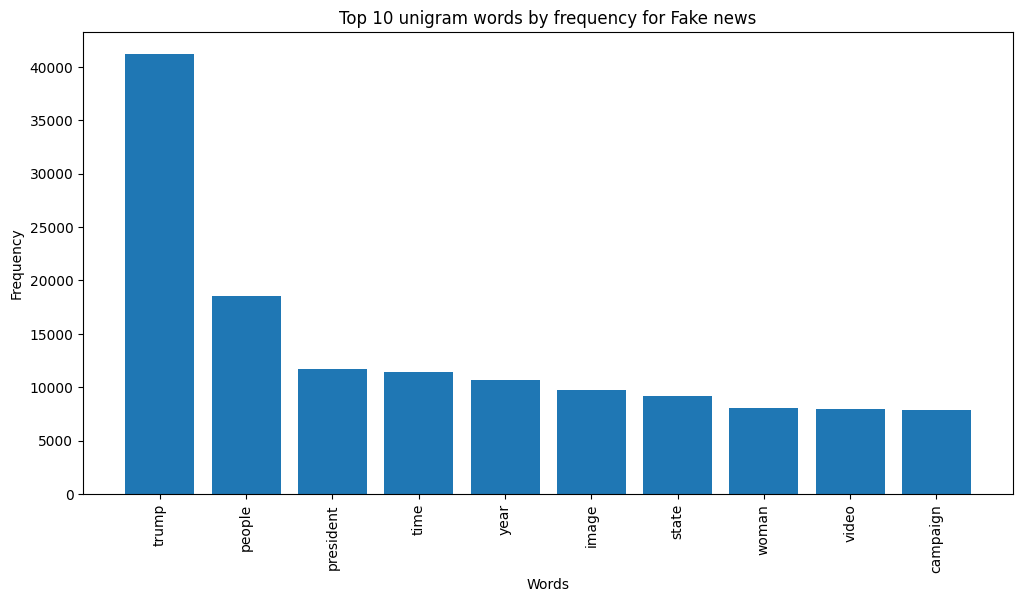

In [60]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
count_n_plot(fake_news,col="lemma_text",n=1,k=10,lbl="unigram words by frequency for Fake news")

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 frequent words
Number of unique words:(743306,)


words
trump supporter    1484
trump campaign     1271
century wire       1259
president trump    1238
police officer     1124
image image        1085
law enforcement    1079
donald trump        976
screen capture      946
climate change      713
Name: count, dtype: int64

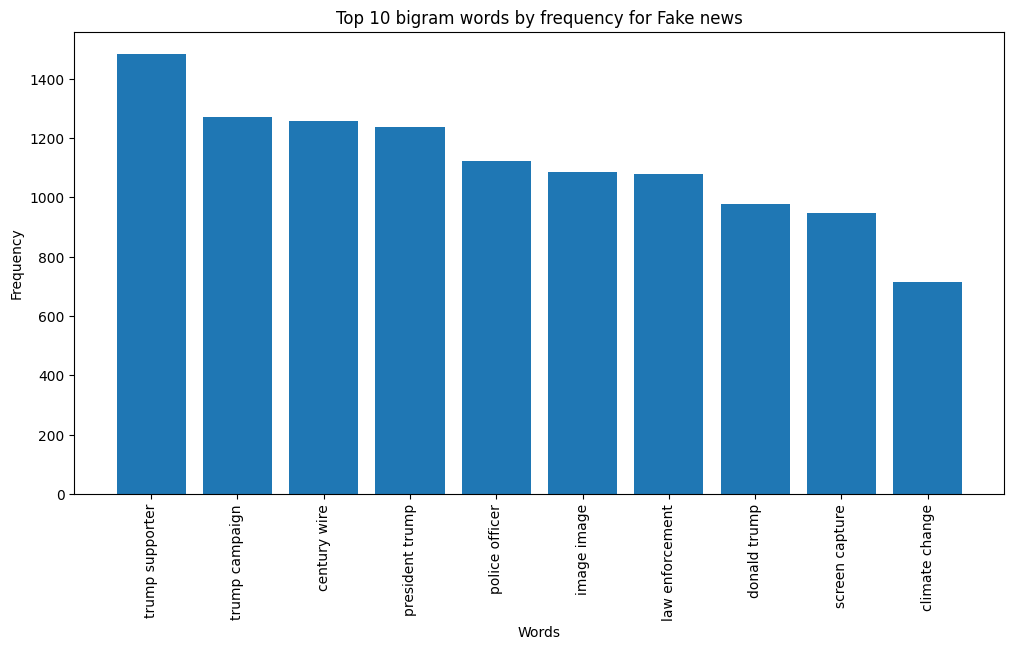

In [59]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
count_n_plot(fake_news,col="lemma_text",n=2,k=10,lbl="bigram words by frequency for Fake news")

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 frequent words
Number of unique words:(1185557,)


words
news century wire                567
video screen capture             507
image video screen               486
image getty image                395
image screen capture             336
subscribe member tv              256
work member tv                   209
filessupport subscribe member    207
century wire filessupport        188
image chip image                 160
Name: count, dtype: int64

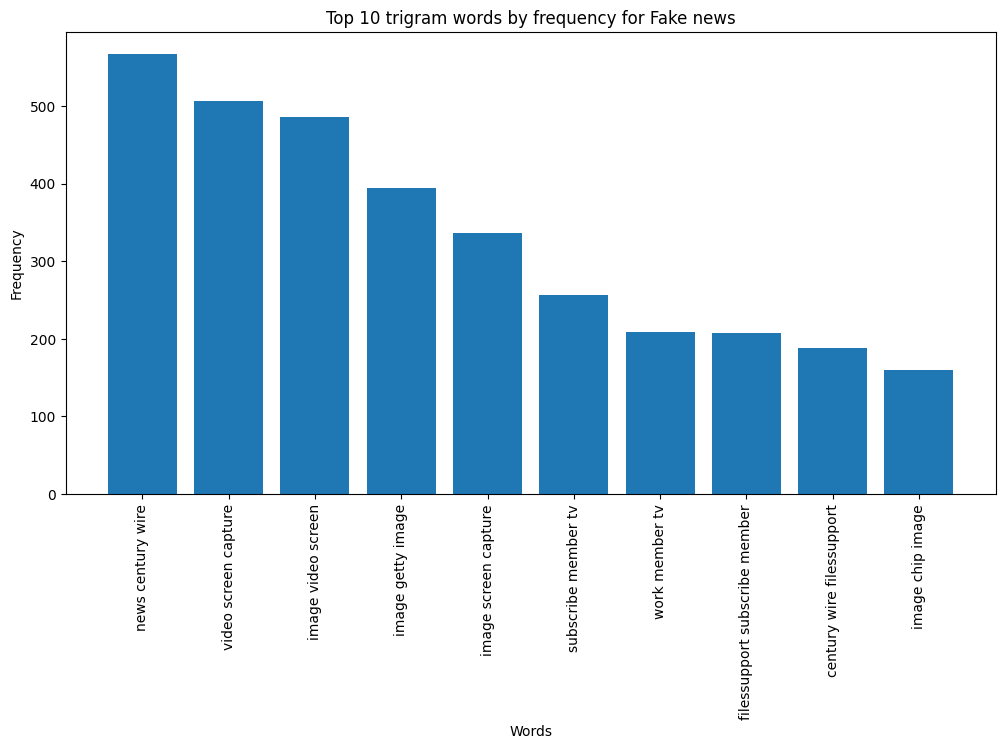

In [61]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
count_n_plot(fake_news,col="lemma_text",n=3,k=10,lbl="trigram words by frequency for Fake news")

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [48]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
from gensim.models import KeyedVectors

# Only load a few most frequent words
limited_model = KeyedVectors.load_word2vec_format(
    "C:/Users/SHAMBHAVVISEN/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz",
    binary=True,
    limit=1000000 # loads only 1M words instead of all 3M
)
limited_model.most_similar(positive=['staff'], topn=10)

[('staffs', 0.6783487200737),
 ('staffers', 0.6749438047409058),
 ('personnel', 0.5877174735069275),
 ('Staff', 0.5849839448928833),
 ('assistants', 0.5353667140007019),
 ('employees', 0.5336239337921143),
 ('Ariel_Zangla_Freeman', 0.5145845413208008),
 ('interns', 0.5104259848594666),
 ('staffing', 0.5044819712638855),
 ('Patricia_Doxsey_Freeman', 0.4978700876235962)]

In [ ]:
limited_model.vector_size

300

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [79]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def extract_lemma_only(data=None,col=None):
    tokens_list=[]
    for idx in range(data.shape[0]):
        tokens=[data[col][idx][0][i][0] for i in range(len(data[col][idx][0]))]
        tokens_list.append(tokens)
    data["lemma_text_only"]=tokens_list
    unique_list=np.unique(np.concatenate(tokens_list))
    return data,unique_list
train_df,unique_list_train=extract_lemma_only(train_df,"lemma_text")
test_df,unique_list_test=extract_lemma_only(test_df,"lemma_text")
### Feature extraction for lemmatized text
def feature_extract(doc, model):
    """
    Input:
    doc: lemma list
    model: word2vec model initialized
    Returns:
    vectors of words in the list -- encoded numerically
    """
    # Remove out-of-vocab words
    valid_words = [word for word in doc if word in model]
    if not valid_words:
        return np.zeros(model.vector_size)  # fallback if doc is empty
    return np.mean([model[word] for word in valid_words], axis=0)

### Convert to vector arrays
X_train = np.array([feature_extract(doc, limited_model) for doc in train_df.lemma_text_only.values])
X_val = np.array([feature_extract(doc, limited_model) for doc in test_df.lemma_text_only.values])
display(X_train[:5])
display(X_val[:5])
print(X_train.shape)
print(X_val.shape)
# ## Extract the target variable for the training data and validation data
Y_train=train_df["news_label"].tolist()
Y_val=test_df["news_label"].tolist()
print(f"Target variable of Train set: {len(Y_train)}")
print(f"Target variable of test/validation set:{len(Y_val)}")


array([[-0.00206623,  0.01839883,  0.03773971, ..., -0.01884606,
         0.01658509,  0.02916802],
       [ 0.06052026, -0.02347611,  0.00026537, ..., -0.09799962,
        -0.00338309,  0.00626109],
       [ 0.0701999 ,  0.10966334,  0.12312212, ..., -0.05541782,
         0.06672879,  0.00682541],
       [ 0.07667474,  0.01408585,  0.03422668, ...,  0.00296751,
         0.02758398,  0.0063779 ],
       [ 0.09571203,  0.00530742,  0.01990654, ..., -0.08810588,
         0.008309  ,  0.02184804]])

array([[ 0.00731452,  0.00709407, -0.01735894, ..., -0.02132395,
         0.04379428, -0.01379802],
       [ 0.07202508,  0.02716783, -0.04873388, ...,  0.08747415,
         0.09117216,  0.01309384],
       [ 0.06458436,  0.06259118,  0.01285655, ..., -0.08724492,
         0.04619915,  0.02621348],
       [-0.00453224,  0.12507471,  0.05784166, ..., -0.06345959,
        -0.0368042 , -0.06382508],
       [ 0.06040757,  0.02697081,  0.01320101, ..., -0.05728984,
        -0.00332175,  0.02157202]])

(31443, 300)
(13476, 300)
Target variable of Train set: 31443
Target variable of test/validation set:13476


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [83]:
## Initialise Logistic Regression model
log_reg=LogisticRegression(max_iter=1000,random_state=40)
## Train Logistic Regression model on training data
log_reg.fit(X_train,Y_train)
## Predict on validation data
y_pred_train=log_reg.predict(X_train)
y_pred_test=log_reg.predict(X_val)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [89]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Logistic Regression results")
print(f"Accuracy of train set: {100*accuracy_score(Y_train,y_pred_train):.2f}%")
print(f"Accuracy of validation set: {100*accuracy_score(Y_val,y_pred_test):.2f}%")
##
print(f"Precision of train set: {100*precision_score(Y_train,y_pred_train):.2f}%")
print(f"Precision of validation set: {100*precision_score(Y_val,y_pred_test):.2f}%")
##
print(f"Recall of train set: {100*recall_score(Y_train,y_pred_train):.2f}%")
print(f"Recall of validation set: {100*recall_score(Y_val,y_pred_test):.2f}%")
##
print(f"f1-score of train set: {100*f1_score(Y_train,y_pred_train):.2f}%")
print(f"f1-score of validation set: {100*f1_score(Y_val,y_pred_test):.2f}%")


Logistic Regression results
Accuracy of train set: 90.17%
Accuracy of validation set: 90.21%
Precision of train set: 89.57%
Precision of validation set: 89.69%
Recall of train set: 89.81%
Recall of validation set: 89.87%
f1-score of train set: 89.69%
f1-score of validation set: 89.78%


In [93]:
# Classification Report
print(classification_report(Y_val,y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7031
           1       0.90      0.90      0.90      6445

    accuracy                           0.90     13476
   macro avg       0.90      0.90      0.90     13476
weighted avg       0.90      0.90      0.90     13476



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [103]:
## Initialise Decision Tree model
DT=DecisionTreeClassifier(max_depth=10,random_state=100,min_samples_leaf=2)
## Train Decision Tree model on training data
DT.fit(X_train,Y_train)
## Predict on validation data
dt_y_pred_train=DT.predict(X_train)
dt_y_pred_test=DT.predict(X_val)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [104]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Decision tree results")
print(f"Accuracy of train set: {100*accuracy_score(Y_train,dt_y_pred_train):.2f}%")
print(f"Accuracy of validation set: {100*accuracy_score(Y_val,dt_y_pred_test):.2f}%")
##
print(f"Precision of train set: {100*precision_score(Y_train,dt_y_pred_train):.2f}%")
print(f"Precision of validation set: {100*precision_score(Y_val,dt_y_pred_test):.2f}%")
##
print(f"Recall of train set: {100*recall_score(Y_train,dt_y_pred_train):.2f}%")
print(f"Recall of validation set: {100*recall_score(Y_val,dt_y_pred_test):.2f}%")
##
print(f"f1-score of train set: {100*f1_score(Y_train,dt_y_pred_train):.2f}%")
print(f"f1-score of validation set: {100*f1_score(Y_val,dt_y_pred_test):.2f}%")


Decision tree results
Accuracy of train set: 91.92%
Accuracy of validation set: 82.11%
Precision of train set: 92.99%
Precision of validation set: 82.95%
Recall of train set: 89.79%
Recall of validation set: 78.79%
f1-score of train set: 91.36%
f1-score of validation set: 80.81%


In [ ]:
# Classification Report
print(classification_report(Y_val,dt_y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      7031
           1       0.83      0.79      0.81      6445

    accuracy                           0.82     13476
   macro avg       0.82      0.82      0.82     13476
weighted avg       0.82      0.82      0.82     13476



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [120]:
## Initialise Random Forest model
rf=RandomForestClassifier(random_state=42)
## Train Random Forest model on training data
rf.fit(X_train,Y_train)
## Predict on validation data
rf_y_pred_train=rf.predict(X_train)
rf_y_pred_test=rf.predict(X_val)


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [121]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Random Forest results")
print(f"Accuracy of train set: {100*accuracy_score(Y_train,rf_y_pred_train):.2f}%")
print(f"Accuracy of validation set: {100*accuracy_score(Y_val,rf_y_pred_test):.2f}%")
##
print(f"Precision of train set: {100*precision_score(Y_train,rf_y_pred_train):.2f}%")
print(f"Precision of validation set: {100*precision_score(Y_val,rf_y_pred_test):.2f}%")
##
print(f"Recall of train set: {100*recall_score(Y_train,rf_y_pred_train):.2f}%")
print(f"Recall of validation set: {100*recall_score(Y_val,rf_y_pred_test):.2f}%")
##
print(f"f1-score of train set: {100*f1_score(Y_train,rf_y_pred_train):.2f}%")
print(f"f1-score of validation set: {100*f1_score(Y_val,rf_y_pred_test):.2f}%")


Random Forest results
Accuracy of train set: 99.99%
Accuracy of validation set: 90.39%
Precision of train set: 99.99%
Precision of validation set: 90.92%
Recall of train set: 99.99%
Recall of validation set: 88.77%
f1-score of train set: 99.99%
f1-score of validation set: 89.83%


In [122]:
# Classification Report
print(classification_report(Y_val,rf_y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7031
           1       0.91      0.89      0.90      6445

    accuracy                           0.90     13476
   macro avg       0.90      0.90      0.90     13476
weighted avg       0.90      0.90      0.90     13476



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.